# Theory of visual attention and salience measurement

In [61]:
%matplotlib inline
from ipywidgets import *;
import numpy as np
from matplotlib.pylab import plt

<img src="./tvatoj_plot_C_kappa_model/cogmod.png">

Let's set our SOA range:

In [2]:
SOAs = range(-150,150,1)

## Mathematical connection between rates $v_p$, $v_r$  and TOJ

$$
P_p(v_p, v_r, \Delta t) = 1-e^{v_p |\Delta t|}+e^{v_p |\Delta t|}\left(\frac{v_p}{v_p+v_r}\right) \quad \text{for } \Delta t < 0
$$

$$ P_p(v_p, v_r, \Delta t) = e^{v_r |\Delta t|}\left(\frac{v_p}{v_p+v_r}\right) \quad \text{for } \Delta t \geq 0 $$

### Python functions and ploting


In [96]:
def pf_tva_simple_toj(SOA, vp, vr):
    SOA = np.array(SOA)
    left = (1-np.exp(-vp*abs(SOA))) + np.exp(-vp*abs(SOA)) * vp/(vp+vr)
    right = np.exp(-vr*abs(SOA))*vp/(vp+vr)
    return ((SOA<=0)*left  + (SOA>0)*right)

Let's set up a plot funtion that uses the simple TVA-based TOJ model included in tvatoj.

In [97]:
def plot(vp,vr,**kwargs):
    plt.plot(SOAs, pf_tva_simple_toj(SOAs,vp,vr),label='p("probe first")')
    plt.ylabel('p("probe first")')
    plt.xlabel('SOA (ms)')
    soa = kwargs.get('soa', None)
    # for marking an soa (needed later)
    if 'soa' in kwargs:
        soa = kwargs['soa']
        plt.axvline(x=soa*1000,color='gray')
    plt.title('Temporal-order judgment')
    plt.legend()

### Visualization of TOJ depending on TVA rates


Use the sliders below to visualize he function for different rates!

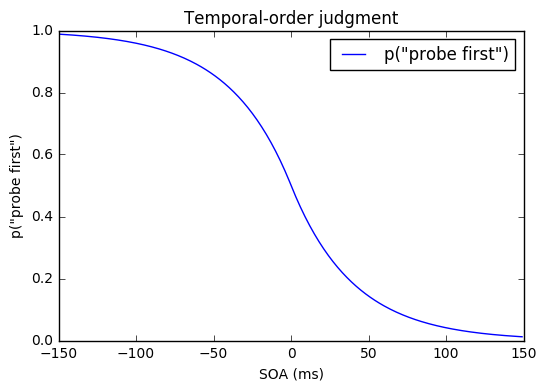

In [98]:
interact(plot, vp=(0,0.050,0.001), vr=(0,0.050,0.001));

### Plot functions for encoding rates

In [99]:
def hazardfunct(vp, vr, soa):
    t = np.arange(0.0, 1, 0.01)
    yp = 1-np.exp(-vp*(t))
    yr = 1-np.exp(-vr*(t))

    plt.plot(t*1000+soa*1000 - 0, yp, label='$v_p$ = {0:.2f}'.format(vp), color = 'red')
    plt.plot(t*1000          - 0, yr, label='$v_r$ = {0:.2f}'.format(vr), color = 'skyblue' )
    plt.ylabel('p("already encoded")')
    plt.xlabel('time relative to SOA 0 (ms)')
    axes = plt.gca()
    axes.set_ylim([0, 1])
    axes.set_xlim([-150 - 0, 150 - 0])
    plt.legend(loc=2)

In [100]:
def plothazfct(vp, vr, soa):
    plt.figure(1)
    plt.subplot(211)
    plot(vp,vr,soa=soa)
    plt.subplot(212)
    hazardfunct(vp*1000,vr*1000,soa)

### Visualization of TOJ depending on TVA rates


Use the sliders below to visualize he function for different rates!

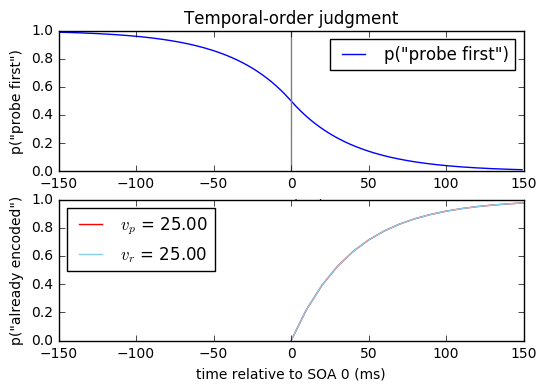

In [102]:
interact(plothazfct, vp=(0,0.050,0.001), vr=(0,0.050,0.001), soa=(-0.1,0.1,0.01));

## TOJ curve can be reparametrized using $\kappa$, $C$ instead of $v_p$, $v_r$ 

$$ v_p = \frac{\kappa_p}{\kappa_p + 1} \cdot C $$

$$v_r = \frac{1}{\kappa_p + 1} \cdot C$$

### Python functions for TOJ $\kappa$, $C$ parametrization and their ploting


In [47]:
def ckplot(C,kappa, soa):
    vp = (kappa/(1+kappa))*C
    vr = (1/(1+kappa))*C
    plt.plot(SOAs, tvatoj.pf_tva_simple_toj(SOAs,vp,vr),label='p("probe first")')
    # axes
    axes = plt.gca()
    axes.set_ylim([0, 1])
    plt.axvline(x=soa*1000,color='gray')
    plt.title('temporal-order judgment')
    plt.legend()

In [48]:
def ckrateplot(C,kappa, soa):
    vp = (kappa/(1+kappa))*C
    vr = (1/(1+kappa))*C
    plt.figure(1)
    plt.subplot(211)
    ckplot(C,kappa,soa)
    plt.subplot(212)
    hazardfunct(vp*1000,vr*1000,soa)
    

## How saliene affects $\kappa$

The initial cluttered display is presentet $150$ ms before the temporal-order judgment. After this time the influence from feature contrasts is strong (e.g. Dombrowe, Olivers, & Donk, 2010). Depending on th experimental condition the probe stimulus may or may not be salient. However, slience is not beneficial for the task of judging the temporal order of the two flicker events. The positions left and right of the fixation mark never change. Therefore salience is not needed to "search" the relevant stimuli.

<img src="./tvatoj_plot_C_kappa_model/procedure-v3-rel.png">

### Example: Neutral condition $0^\circ$ orientation contrast

<img src="./tvatoj_plot_C_kappa_model/neutral.gif">

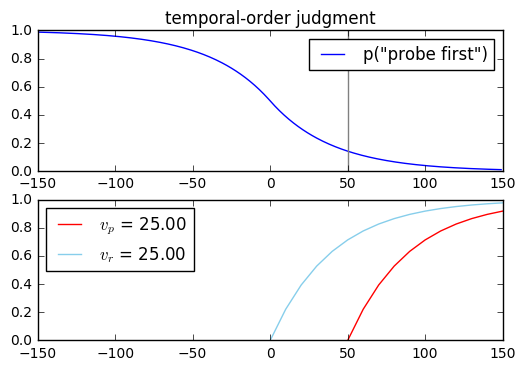

In [49]:
interact(ckrateplot, C=(0.001,0.1,0.001), kappa=(1,10,0.1), soa=(-0.100, 0.100, 0.01));

### Example: Experimental condition $90^\circ$ orientation contrast ($\kappa = 2.1$)

<img src="./tvatoj_plot_C_kappa_model/experimental.gif">

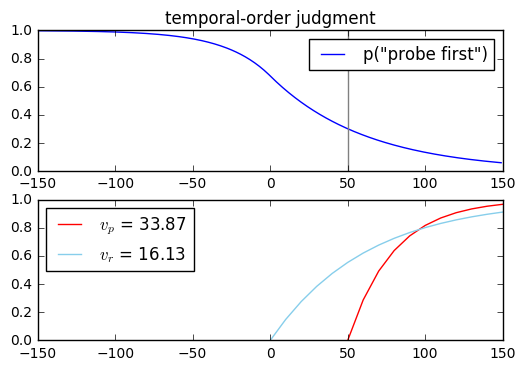

In [50]:
interact(ckrateplot, C=(0.001,0.1,0.001), kappa=(1,10,0.1), soa=(-0.100, 0.100, 0.01));

$$ \kappa_p = 1 + k_o {\Delta o}^{n_o} + k_l {\Delta l}^{n_l}$$

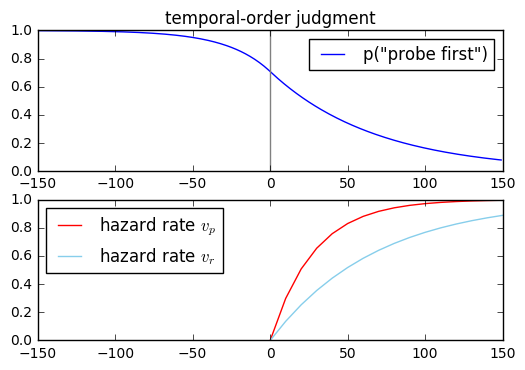

In [37]:
def powerlawmodelplot(deltao,deltal, c, soa):
    ko = 0.08
    no = 0.63
    kl = 0.22
    nl = 0.66
    k = 1+ko*pow(deltao,no)+kl*pow(deltal,nl)
    ckrateplot(c,k, soa)
interact(powerlawmodelplot, deltao=(0,90,1), deltal=(0,50,1), c=(0.001,0.1,0.001), soa=(-0.100, 0.100, 0.01));